<a href="https://colab.research.google.com/github/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_04_Wayne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #04
### Interpretable ML

Instructions
imodels is an interpretability library in python that has support for many decision rule set and list algorithms (https://github.com/csinva/imodels?tab=readme-ov-file).



From the list of supported models available in the README (link above), choose three algorithms to demo on a dataset of your choice.



In addition to a demonstration for each of your chosen algorithms, you should provide an explanation of the method via a visual. This visual can be a block diagram, a slide, or anything of your choosing. It should represent the method in a way that your fellow students would be able to understand the algorithm visually.


### Wayne Yang
#### https://github.com/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_04_Wayne.ipynb

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1QDUfUw5Qc-ToWoOmDOveGh3JXxRv_ISh#scrollTo=P9ZERjG3PqyA)

In [1]:
!rm -r ./sample_data

In [2]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data


# Clone GitHub files to colab workspace
repo_name = "Duke_xAI_Wayne" # Change to your repo name
git_path = 'https://github.com/Trip1ewhy/Duke_xAI_Wayne.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment #04_Wayne'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Duke_xAI_Wayne'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 124 (delta 35), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (124/124), 35.24 MiB | 16.40 MiB/s, done.
Resolving deltas: 100% (35/35), done.
[Errno 2] No such file or directory: 'Duke_xAI_Wayne/Assignment #04_Wayne'
/content
Duke_xAI_Wayne/


## Data Preparation ##
https://www.kaggle.com/datasets/taweilo/mba-admission-dataset

This is a multi-feature problem that determines whether a student is admitted during their MBA application. There are three possible outcomes: admitted, waitlisted, and null, which indicates not admitted.

In [3]:
!pip install imodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 2.0 MB/s eta 0:00:00


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from imodels import RuleFitClassifier, OptimalRuleListClassifier, GreedyTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Load the dataset from CSV
df = pd.read_csv('/content/Duke_xAI_Wayne/Assignment #04/MBA.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [7]:
#Replace "Waitlist" to "Admit", to make this problem a binary classification problem (There are only 2% "WaitList")
# Replace nan to "notAdmit"
# Replace 'Waitlist' with 'Admit' in the 'admission' column
df['admission'] = df['admission'].replace('Waitlist', 'Admit')
df['admission'] = df['admission'].fillna('notAdmit')
unique_values = df['admission'].unique()

# Display the unique values
print(unique_values)


['Admit' 'notAdmit']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
#Not need application_id
data = df.drop(columns=['application_id'])
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,notAdmit
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,notAdmit
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,notAdmit


In [9]:
#Make every feature to numerical data
categorical_columns = ['gender', 'international','major','race','work_industry',"admission"]  # Replace with actual column names
####Admission is 1
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder and transform to a new array
encoded_features = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# 查看前几行数据
print(encoded_df.head())



   gender_Female  gender_Male  international_False  international_True  \
0            1.0          0.0                  1.0                 0.0   
1            0.0          1.0                  1.0                 0.0   
2            1.0          0.0                  0.0                 1.0   
3            0.0          1.0                  1.0                 0.0   
4            0.0          1.0                  1.0                 0.0   

   major_Business  major_Humanities  major_STEM  race_Asian  race_Black  \
0             1.0               0.0         0.0         1.0         0.0   
1             0.0               1.0         0.0         0.0         1.0   
2             1.0               0.0         0.0         0.0         0.0   
3             0.0               0.0         1.0         0.0         1.0   
4             0.0               0.0         1.0         0.0         0.0   

   race_Hispanic  ...  work_industry_Investment Management  \
0            0.0  ...                     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
#Preprocess the data
# Assuming the target column is named 'target', adjust it to match your dataset's target column
# Combine encoded features with the rest of the dataset
data_numerical = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)
#X = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)
X = data_numerical.drop(columns=['admission_Admit','admission_notAdmit'])  # Drop the target column to get the features
y = data_numerical['admission_Admit']  # Target variable, only make Admit as single target

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gpa,gmat,work_exp,gender_Female,gender_Male,international_False,international_True,major_Business,major_Humanities,major_STEM,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,3.30,620.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.28,680.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.30,710.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.47,690.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.35,590.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,3.49,640.0,5.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6190,3.18,670.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6191,3.22,680.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6192,3.36,590.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,admission_Admit
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
6189,0.0
6190,0.0
6191,1.0
6192,0.0


In [13]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#y_test.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Fit models#

### Rulefit rule set###


Ref: https://www.researchgate.net/figure/A-tree-based-description-of-how-RuleFit-works-with-two-variables_fig1_367454863
https://link.springer.com/article/10.1007/s12530-022-09434-4

#### visual ####

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


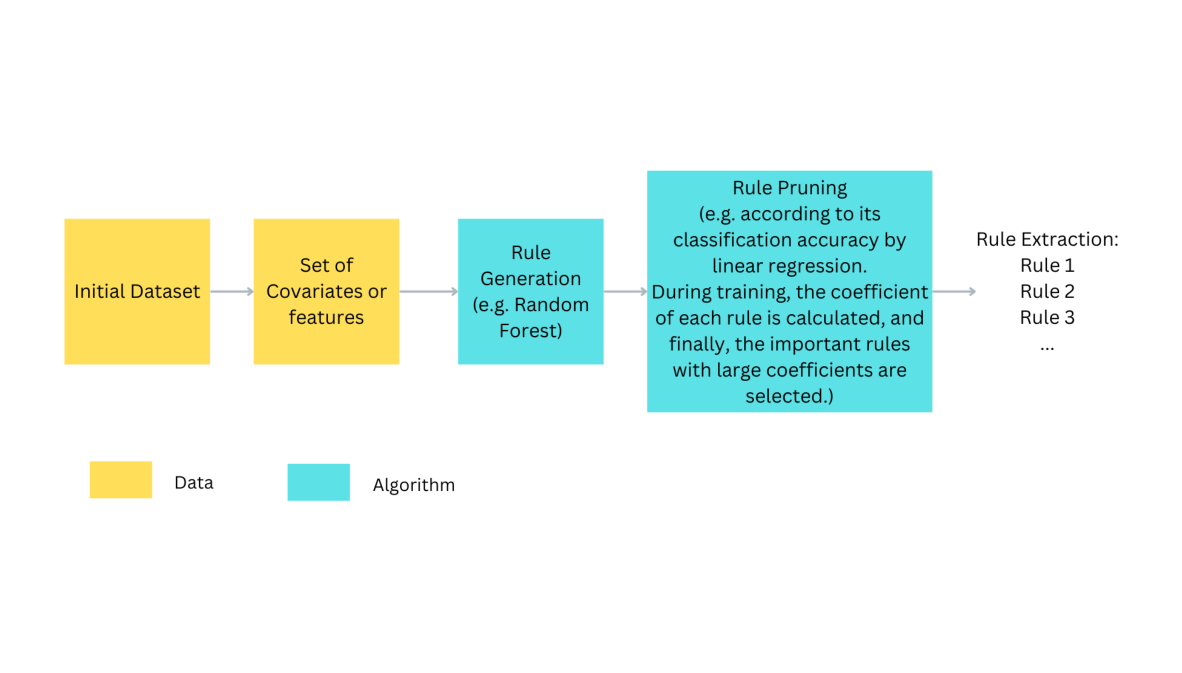

In [24]:
img_path = '/content/Duke_xAI_Wayne/Assignment #04/Rulefit rule set.png'
img = Image.open(img_path)
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [15]:
#Initialize and fit the models
# RuleFitClassifier
rulefit_model = RuleFitClassifier(max_rules=10)
rulefit_model.fit(X_train, y_train)
rulefit_preds = rulefit_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#: Evaluate the models
print("RuleFitClassifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rulefit_preds)}")
print(classification_report(y_test, rulefit_preds))

RuleFitClassifier Evaluation:
Accuracy: 0.8244028405422853
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      1277
         1.0       0.00      0.00      0.00       272

    accuracy                           0.82      1549
   macro avg       0.41      0.50      0.45      1549
weighted avg       0.68      0.82      0.75      1549



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/

###Optimal rule list###


#### Visual ####

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


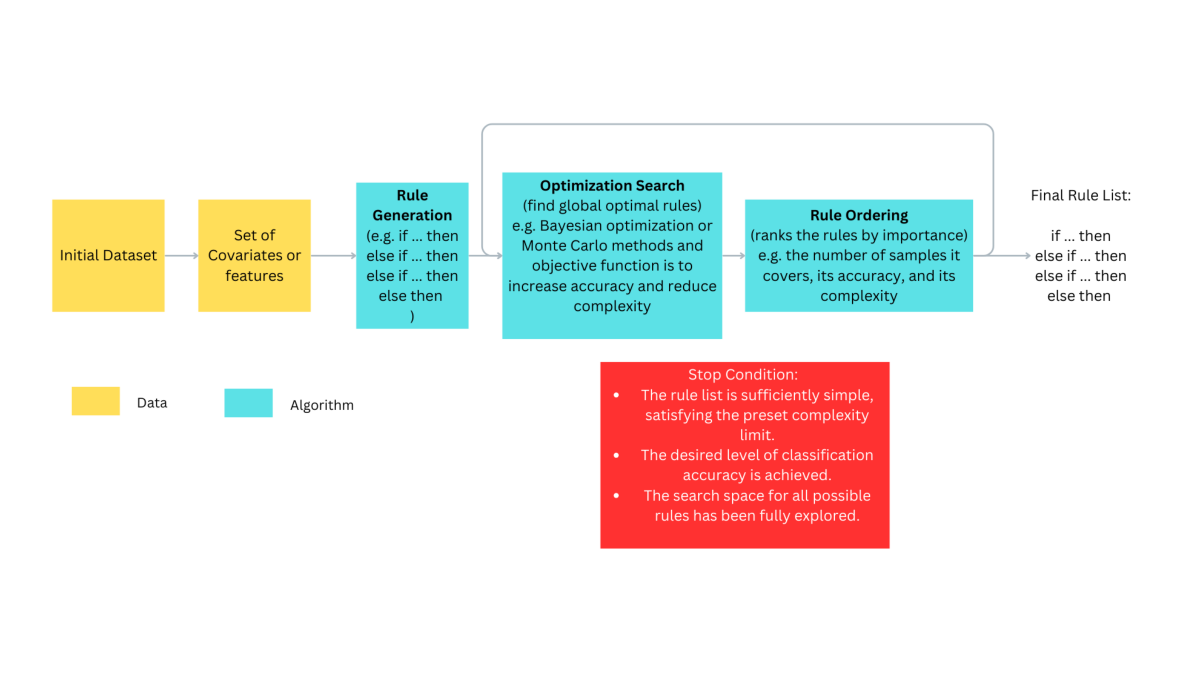

In [25]:
img_path = '/content/Duke_xAI_Wayne/Assignment #04/Optimal Rule List.png'
img = Image.open(img_path)
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [17]:
# OptimalRuleListClassifier
CORELS_model = OptimalRuleListClassifier()
CORELS_model.fit(X_train, y_train)
CORELS_preds = CORELS_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/imodels/rule_list/corels_wrapper.py:87: UserWarning: Should install corels with pip install corels. Using GreedyRuleList instead.
  warnings.warn("Should install corels with pip install corels. Using GreedyRuleList instead.")


In [18]:
print("\OptimalRuleListClassifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, CORELS_preds)}")
print(classification_report(y_test, CORELS_preds))

\OptimalRuleListClassifier Evaluation:
Accuracy: 0.8244028405422853
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      1277
         1.0       0.00      0.00      0.00       272

    accuracy                           0.82      1549
   macro avg       0.41      0.50      0.45      1549
weighted avg       0.68      0.82      0.75      1549



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\O'
<>:1: DeprecationWarning: invalid escape sequence '\O'
<ipython-input-18-c0085c24a8db>:1: DeprecationWarning: invalid escape sequence '\O'
  print("\OptimalRuleListClassifier Evaluation:")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: Und

### Greedy rule tree###

#### Visual ####

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


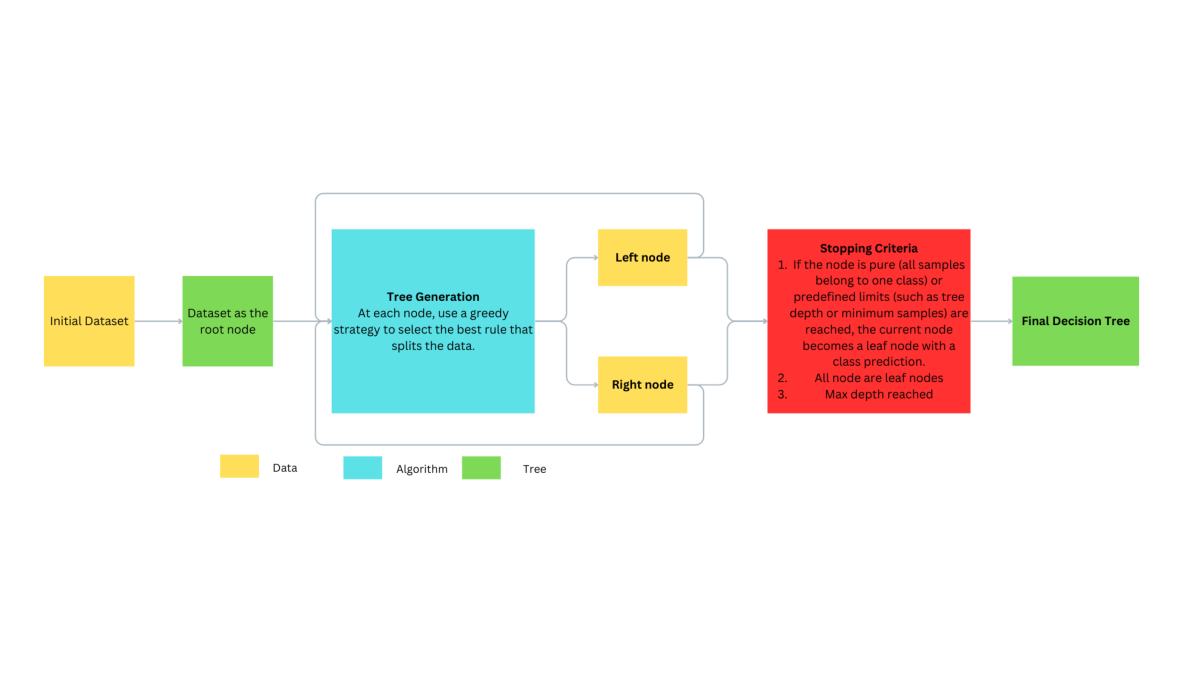

In [26]:
img_path = '/content/Duke_xAI_Wayne/Assignment #04/Greedy Rule Tree.png'
img = Image.open(img_path)
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [19]:
# GreedyTreeClassifier
greedy_model = GreedyTreeClassifier(max_depth=10)
greedy_model.fit(X_train, y_train)
greedy_preds = greedy_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GreedyTreeClassifier was fitted without feature names
  warnings.warn(


In [20]:
#greedy_preds_converted = np.where(greedy_preds == 0, 'Admit', 'notAdmit')
#print(type(greedy_preds))
print("\nGreedyTreeClassifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, greedy_preds)}")
print(classification_report(y_test, greedy_preds))


GreedyTreeClassifier Evaluation:
Accuracy: 0.8095545513234345
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      1277
         1.0       0.42      0.22      0.29       272

    accuracy                           0.81      1549
   macro avg       0.64      0.58      0.59      1549
weighted avg       0.77      0.81      0.79      1549



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
